In [1]:
import numpy as np
import math

# REWARDS = np.array([-50,-5,20,10]) # all pareto optimal
# THREATS = np.array([-20,-30,-100,-40])

REWARDS = np.array([-50,-5,20,-70]) # A,B,C pareto optimal
THREATS = np.array([-2,-8,-10,-8])*10

# REWARDS = np.array([-50,-5,20,-70]) # A,C pareto optimal
# THREATS = np.array([-2,-9,-10,-8])

# REWARDS = np.array([-25,-25,25,25])
# THREATS = np.array([25,25,-25,-25])
refpoint = np.array([0,0])
max_reward = np.max(REWARDS)
max_threat = np.max(THREATS)

p = 0.04
W = int(1/p)+1
tau = np.array([0.1, 0.5,  1,  4, 16, 32, 64, 256,1024])
N_tau = np.size(tau)
epsilon = np.arange(11)*0.1
epsilon = np.around(epsilon, decimals = 2)
N_eps = np.size(epsilon)

def probabilities_one(R,T):
    P = np.zeros((W,N_tau,4))
    for n in range(N_tau):
        for w in range(W):
            weight = [w*p, 1.0-w*p]
            temp = (weight[0]*R + weight[1]*T)/tau[n]
            P[w,n,:] = np.exp(temp)/np.sum(np.exp(temp))
    learner = "Softmax"
    return np.round(P,3), learner

def probabilities_two(R,T):
    P = np.zeros((W,N_tau,4))
    for n in range(N_tau):
        ex_R = np.exp((R - np.max(R))/tau[n])
        ex_T = np.exp((T - np.max(T))/tau[n])
        weight_R = ex_R/np.sum(ex_R)
        weight_T = ex_T/np.sum(ex_T)
        for w in range(W):
            weight = [w*p,1.0-w*p]
            P[w,n,:] = weight[0]*weight_R + weight[1]*weight_T
    learner = "Softmax Two"
    return np.round(P,3), learner



def hypervolume(R,T, refpoint):
    P = np.zeros((W,N_tau,4))
    for n in range(N_tau):
        for w in range(W):
            temp = np.zeros(4)
            for i in range(4):
                temp[i] = pow(abs(R[i] - np.min(R) +refpoint[0]), w*p/tau[n])*pow(abs(T[i] - np.min(T)+refpoint[1]), (1-w*p)/tau[n])
            #print(temp)
            P[w,n,:] = temp/np.sum(temp)
    learner = "Hypervolume"
    return P, learner

def eps_greedy(R,T,eps):
    P = np.zeros((W,N_eps,4))
    temp = np.zeros(4)
    for n in range(N_eps):
        for w in range(W):
            weight = [w*p, 1-w*p]
            for i in range(4):
                temp[i] = weight[0]*R[i] + weight[1]*T[i]
            k = np.argmax(temp)
            for i in range(4):
                if i == k:
                    P[w,n,i] = 1-0.75*eps[n]
                else:
                    P[w,n,i] = 0.25*eps[n]
    
    learner = "Epsilon-Greedy"
    return P, learner
rew_regret = np.zeros((4,5))        
reward_regret = np.zeros((W,N_tau,5))
threat_regret = np.zeros((W,N_tau,5))
for i in range(5):
    REW = REWARDS + np.array([0,i-2,0,0])*15
    print(REW)
    prob, learner_type = probabilities_one(REW,THREATS)
    for w in range(W):
        for n in range(N_tau):
            reward_regret[w,n,i] = max_reward - np.dot(prob[w,n], REW)
            threat_regret[w,n,i] = max_threat - np.dot(prob[w,n], THREATS)

    thr_regret = max_threat -THREATS
    rew_regret[:,i] = max_reward - REW



[-50 -35  20 -70]
[-50 -20  20 -70]
[-50  -5  20 -70]
[-50  10  20 -70]
[-50  25  20 -70]


In [2]:
# Pareto front plotter
# Decides if (a,b) is strictly dominated by (a1,b1)
def isPareto(a,b,a1,b1):
    if a==a1:
        if b > b1:
            return True
        else:
            return False
    elif a < a1:
        return False
    elif b>=b1:
        return True
    else:
        return False
     

50.25 39.980000000000004
50.25 39.980000000000004
50.25 39.980000000000004
50.25 39.980000000000004
50.25 39.980000000000004
50.25 39.980000000000004
50.25 39.980000000000004
50.25 39.980000000000004
50.25 39.980000000000004
47.17 40.78
47.17 40.78
47.17 40.78
47.17 40.78
47.17 40.78
47.17 40.78
47.17 40.78
47.17 40.78
47.17 40.78
43.01 41.64
43.01 41.64
43.01 41.64
43.01 41.64
43.01 41.64
43.01 41.64
43.01 41.64
43.01 41.64
43.01 41.64
37.6 42.61999999999999
37.6 42.61999999999999
37.6 42.61999999999999
37.6 42.61999999999999
37.6 42.61999999999999
37.6 42.61999999999999
37.6 42.61999999999999
37.6 42.61999999999999
37.6 42.61999999999999
30.804999999999993 43.7
30.804999999999993 43.7
30.804999999999993 43.7
30.804999999999993 43.7
30.804999999999993 43.7
30.804999999999993 43.7
30.804999999999993 43.7
30.804999999999993 43.7
30.804999999999993 43.7


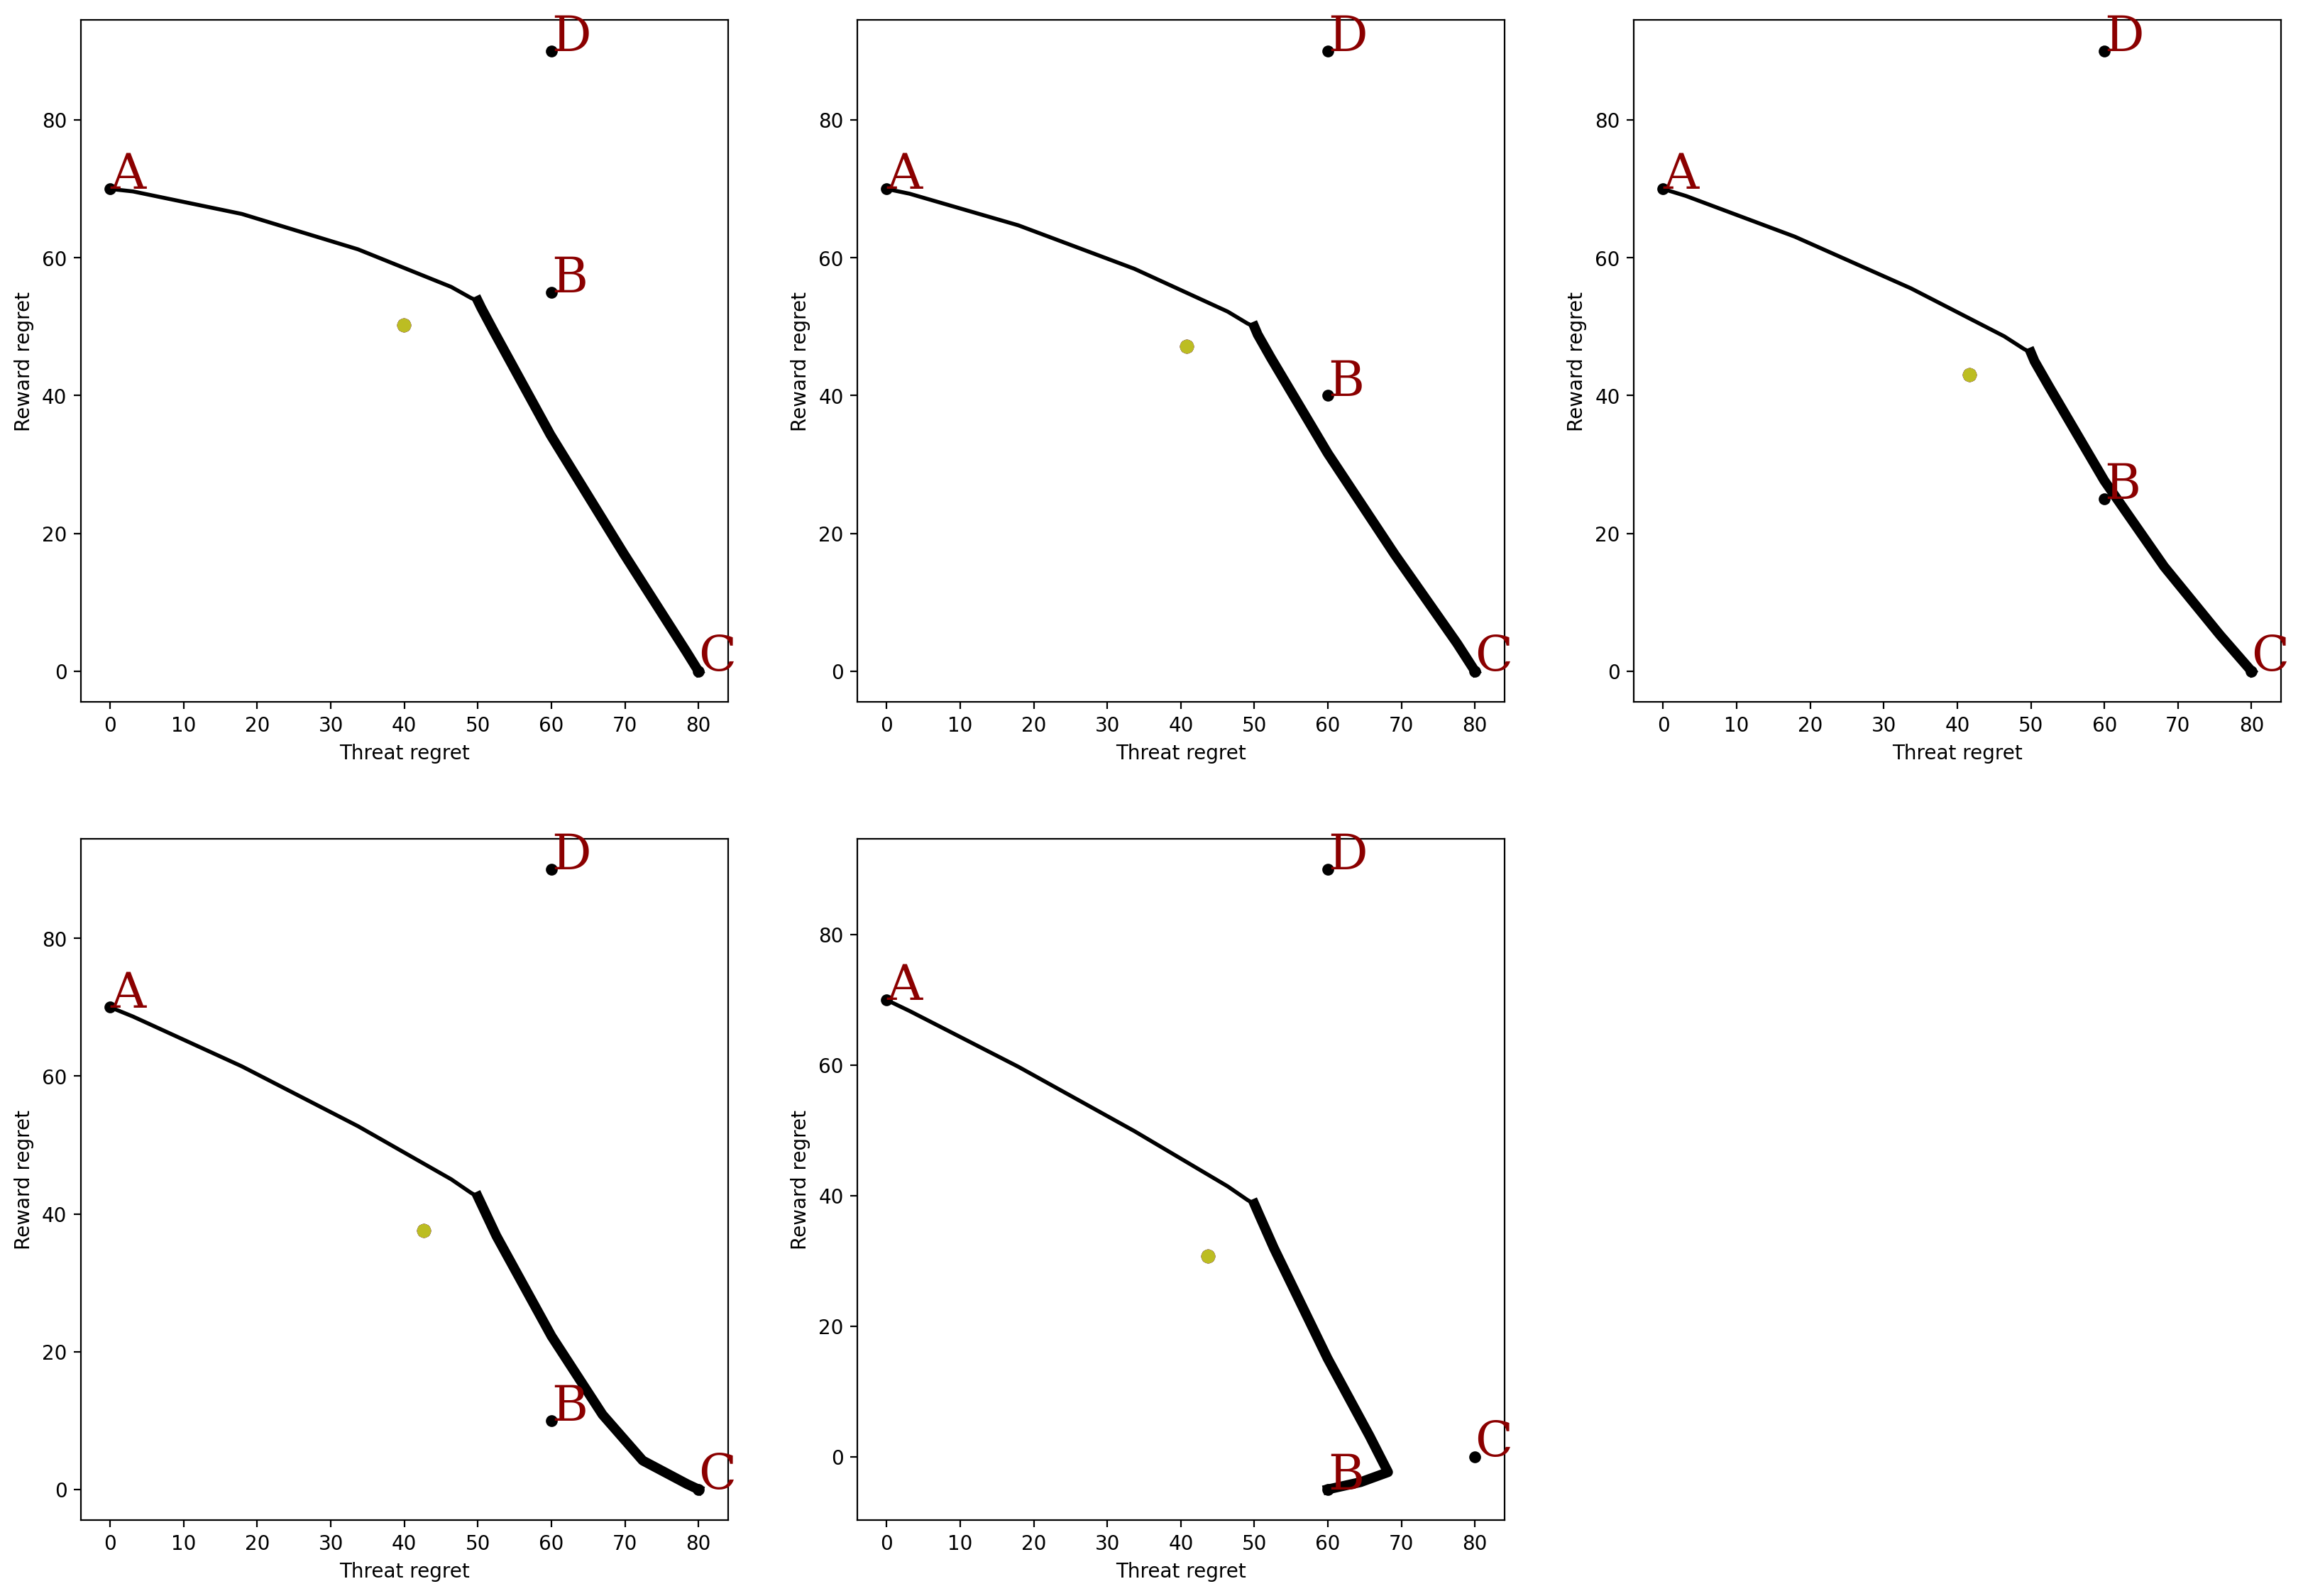

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig_one = figure(figsize=(20, 14), dpi=200)



#----------------------Plotting The Boundary of Feasible Region-------------------------------
for m in range(5):
    plt.subplot(2,3,m+1)
    plt.plot(thr_regret,rew_regret[:,m], "kx", marker = "o", markersize = 5, markerfacecolor = "black")
    # first plot the Pareto Front between A,B,C,D
    front_x = []
    front_y = []
    for i in range(4):
        count = 0
        for j in range(4):
            if isPareto(thr_regret[i], rew_regret[i,m], thr_regret[j],rew_regret[j,m]):
                count+=1
        #print(count)
        if count == 0:
            front_x.append(thr_regret[i])
            front_y.append(rew_regret[i,m])
    sorted_pareto = []
    for i in range(len(front_x)):
        sorted_pareto.append([front_x[i], front_y[i]])
    sorted_pareto.sort()


    front = np.array(sorted_pareto)


    #plt.plot(front[:,0], front[:,1], color = "red", linewidth = 5)

    thr_regret = np.round(thr_regret, 2)
    rew_regret = np.round(rew_regret, 2)

    centroid_x = np.mean(thr_regret)
    centroid_y = np.mean(rew_regret[:,m])

    zero_x = threat_regret[0,:,m]
    zero_y = reward_regret[0,:,m]
    one_x = threat_regret[W-1,:,m]
    one_y = reward_regret[W-1,:,m]

    zero_x = np.append(zero_x, centroid_x)
    zero_y = np.append(zero_y, centroid_y)
    one_x = np.append(one_x, centroid_x)
    one_y = np.append(one_y, centroid_y)


    plt.plot(zero_x, zero_y, color = 'black', linewidth = 2)
    #plt.legend('asdsa')
    plt.plot(one_x, one_y, color = 'black', linewidth = 5)
    lbls = ['A ', 'B', 'C', 'D']
    #lbls_SGT = ['A,B', 'A,B','C,D', 'C,D']
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 25,
        }
    for i in range(4):
        plt.text(thr_regret[i], rew_regret[i,m], lbls[i], fontdict = font )

    #plt.text(centroid_x, centroid_y,'Centroid', fontdict = font)
    #------------------------------------Plotting The Interior of Feasible Region---------------------------------------------
    lgd = []
    for n in range(N_tau):
        lgd.append("tau = "+str(tau[n]))


    for n in range(N_tau):

        y = reward_regret[11,5,m]
        x = threat_regret[11,5,m]
        print(y,x)
        plt.scatter(x, y)
        #plt.plot(x,y)
        #plt.legend(lgd, fontsize = 15)
    #print(max_threat, max_reward)
    #plt.plot(max_threat, max_reward,'o')   
    plt.xlabel("Threat regret", fontsize = 10)
    plt.ylabel("Reward regret", fontsize = 10)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    #plt.title("Pareto Front for SGT " , fontsize=35)

